In [51]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

In [13]:
JPHACKS_dir = Path('/home/qiushi/workspace/JPHACKS/')
avipath = Path('/home/qiushi/workspace/JPHACKS/input/cLgEcNPr-ZE.mp4.avi')

In [15]:
cap = cv2.VideoCapture(str(avipath))

In [17]:
cap.get(cv2.CAP_PROP_FPS)

30.0

In [3]:
landmarkpath = Path('/home/qiushi/workspace/JPHACKS/output/processed/cLgEcNPr-ZE.mp4.csv')
lm_df = pd.read_csv(landmarkpath)

In [11]:
lm_df

,frame,face_id,timestamp,confidence,success,gaze_0_x,gaze_0_y,gaze_0_z,gaze_1_x,gaze_1_y,...,AU12_c,AU14_c,AU15_c,AU17_c,AU20_c,AU23_c,AU25_c,AU26_c,AU28_c,AU45_c
0,1,0,0.000,0.98,1,0.112489,0.331306,-0.936794,-0.073350,0.355988,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,2,0,0.033,0.98,1,0.105248,0.326979,-0.939153,-0.081454,0.353870,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,3,0,0.067,0.98,1,0.105793,0.327215,-0.939009,-0.081809,0.353689,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,4,0,0.100,0.98,1,0.104161,0.329869,-0.938263,-0.083390,0.355106,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,5,0,0.133,0.98,1,0.104819,0.329974,-0.938153,-0.082190,0.353820,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8833,8834,0,294.433,0.82,1,0.383314,0.153771,-0.910728,0.246884,0.154119,...,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
8834,8835,0,294.467,0.88,1,0.398900,0.165050,-0.902019,0.272616,0.166601,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
8835,8836,0,294.500,0.88,1,0.391459,0.216659,-0.894326,0.259181,0.214767,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
8836,8837,0,294.533,0.88,1,0.404498,0.233895,-0.884123,0.268191,0.230534,...,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0


In [29]:
lm_df['frame'].max() / 30 / 60

4.91

# 外れ値を除外する

## 手順
- 再瀕値を出す
- その前後+-0.3をリストアップする
- グラフでその出現を可視化する

<!-- ![img](./assets/Rotation_explained.png) -->
<img src="./assets/Rotation_explained.png" alt="Drawing" style="width: 400px;"/>

### poseRx

count    8838.000000
mean        0.301311
std         0.208412
min        -3.113000
25%         0.208000
50%         0.282000
75%         0.390000
max         3.055000
Name:  pose_Rx, dtype: float64

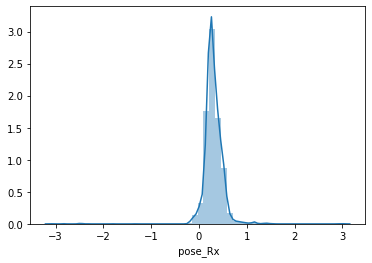

In [116]:
sns.distplot(lm_df[' pose_Rx'])
lm_df[' pose_Rx'].describe()

### poseRy

count    8838.000000
mean       -0.035301
std         0.193091
min        -1.447000
25%        -0.121000
50%        -0.061000
75%         0.041000
max         1.274000
Name:  pose_Ry, dtype: float64

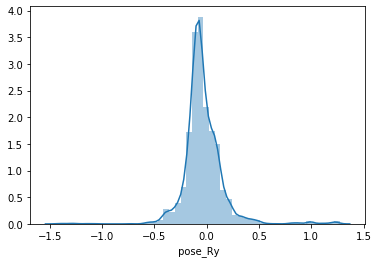

In [114]:
sns.distplot(lm_df[' pose_Ry'])
lm_df[' pose_Ry'].describe()

### poseRz

count    8838.000000
mean       -0.034534
std         0.151366
min        -2.794000
25%        -0.071000
50%        -0.028000
75%         0.004000
max         3.027000
Name:  pose_Rz, dtype: float64

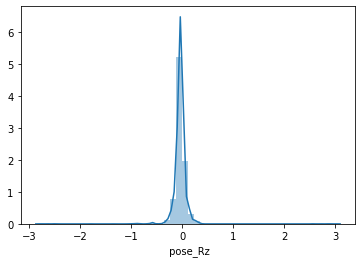

In [115]:
sns.distplot(lm_df[' pose_Rz'])
lm_df[' pose_Rz'].describe()

In [153]:
def get_valid_ranged_flag(ser: pd.Series, threshold: int = 1) -> pd.Series:
    _mean, _std = ser.mean(), ser.std()
    _min = 0 - (_std * threshold)
    _max = 0 + (_std * threshold)
    return ((ser > _min) & (ser < _max)) * 1

In [154]:
lm_df[' pose_Rx_valid'] = get_valid_ranged_flag(lm_df[' pose_Rx'], 4)
lm_df[' pose_Ry_valid'] = get_valid_ranged_flag(lm_df[' pose_Ry'], 2)
lm_df[' pose_Rz_valid'] = get_valid_ranged_flag(lm_df[' pose_Rz'], 4.3)
print(
    sum(lm_df[' pose_Rx_valid']),
    sum(lm_df[' pose_Ry_valid']),
    sum(lm_df[' pose_Rz_valid']),
)

8725 8464 8801


In [67]:
lm_df[[' pose_Rx_valid', ' pose_Ry_valid', ' pose_Rz_valid']].values.shape

(8838, 3)

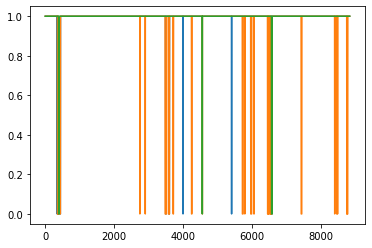

In [155]:
x = np.arange(len(lm_df))
sns.lineplot(x, lm_df[' pose_Rx_valid'].values)
sns.lineplot(x, lm_df[' pose_Ry_valid'].values)
sns.lineplot(x, lm_df[' pose_Rz_valid'].values)

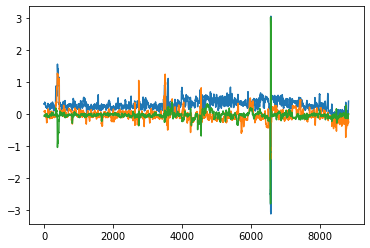

In [77]:
x = np.arange(len(lm_df))
sns.lineplot(x, lm_df[' pose_Rx'].values)
sns.lineplot(x, lm_df[' pose_Ry'].values)
sns.lineplot(x, lm_df[' pose_Rz'].values)

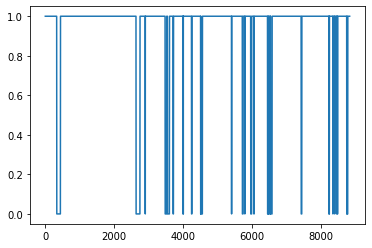

In [156]:
x = np.arange(len(lm_df))
sns.lineplot(x, (lm_df[' pose_Rx_valid'] * lm_df[' pose_Ry_valid'] * lm_df[' pose_Rz_valid'] * lm_df[' success']).values)

In [151]:
lm_df[3474:3574]

,frame,face_id,timestamp,confidence,success,gaze_0_x,gaze_0_y,gaze_0_z,gaze_1_x,gaze_1_y,...,AU17_c,AU20_c,AU23_c,AU25_c,AU26_c,AU28_c,AU45_c,pose_Rx_valid,pose_Ry_valid,pose_Rz_valid
3474,3475,0,115.800,0.98,1,0.134966,0.391308,-0.910309,-0.051312,0.408360,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1,1,1
3475,3476,0,115.833,0.98,1,0.087369,0.385828,-0.918424,-0.099502,0.399599,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1,1,1
3476,3477,0,115.867,0.93,1,0.022863,0.384233,-0.922953,-0.153601,0.389853,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1,1,1
3477,3478,0,115.900,0.82,1,-0.027768,0.361933,-0.931790,-0.193440,0.363070,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1,1,1
3478,3479,0,115.933,0.98,1,-0.136755,0.339756,-0.930518,-0.284663,0.350872,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3569,3570,0,118.967,0.03,0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,1
3570,3571,0,119.000,0.03,0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,1
3571,3572,0,119.033,0.03,0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,1
3572,3573,0,119.067,0.03,0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,1


In [157]:
lm_df[3474:3574][[' pose_Rx', ' pose_Ry', ' pose_Rz', ' pose_Rx_valid', ' pose_Ry_valid', ' pose_Rz_valid', ' success']].head(50)

,pose_Rx,pose_Ry,pose_Rz,pose_Rx_valid,pose_Ry_valid,pose_Rz_valid,success
3474,0.362,0.040,-0.048,1,1,1,1
3475,0.343,0.110,-0.039,1,1,1,1
3476,0.330,0.205,-0.034,1,1,1,1
3477,0.304,0.271,-0.021,1,1,1,1
3478,0.299,0.435,-0.040,1,0,1,1
3479,0.298,0.500,-0.039,1,0,1,1
3480,0.271,0.492,-0.016,1,0,1,1
3481,0.244,0.497,0.014,1,0,1,1
3482,0.243,0.493,0.022,1,0,1,1
3483,0.286,0.511,0.008,1,0,1,1
